# 딥러닝을 이용한 고객 이탈 예측

## #1. Pytorch를 이용한 딥러닝
## #2. 딥러닝 이론
## #3. 미니 프로젝트

유통업이란?
  생산된 상품을 소비자에게 전달하기 위한 모든 활동:
  제조업체, 도매업자, 소매업자, 유통채널, 마케팅 및 판매, 전자상거래, 로지스틱스 등

유통업계 현황
  이마롯쿠 (국내 유통 3강인 이마트, 롯데마트, 쿠팡을 의미)
  쿠팡, 이커머스서 '리테일' 기업으로 변신 중

  
## 딥러닝 기초수학


In [8]:
import torch
import numpy as np

In [9]:
data = [[1,2], [3,4]]
tensor = torch.tensor(data, dtype=torch.float)
# 딥러닝은 dtype 이 실수가 아니면 돌아가지 않음.

In [10]:
print(tensor.dtype,'\n',tensor)

torch.float32 
 tensor([[1., 2.],
        [3., 4.]])


In [11]:
np_array = np.array(data, dtype=float)
tensor1 = torch.from_numpy(np_array)

print(tensor1)

tensor([[1., 2.],
        [3., 4.]], dtype=torch.float64)


In [12]:
#np_array = np.array(data)
#tensor1 = torch.from_numpy(np_array, dtype=torch.float)

#print(tensor1)

In [13]:
ones = torch.ones_like(tensor)
rands=torch.rand_like(tensor)
print(ones, '\n', rands)

tensor([[1., 1.],
        [1., 1.]]) 
 tensor([[0.7733, 0.4626],
        [0.1960, 0.7098]])


In [14]:
tensor.dtype #data type
tensor.shape #data shape
tensor.size() # data shape

tensor.device # device 확인

device(type='cpu')

In [16]:
if torch.cuda.is_available():
  tensor = tensor.to('cuda')
  print(f"Device tensor is sored on: {tensor.device}")

Device tensor is sored on: cuda:0


인덱싱, 슬라이싱

In [17]:
data = [[1,2,3],[4,5,6],[7,8,9]]

tensor2 = torch.tensor(data)

In [19]:
tensor2[0,1]

tensor(2)

In [20]:
tensor2[:2,]

tensor([[1, 2, 3],
        [4, 5, 6]])

In [23]:
tensor_new = torch.cat([tensor2, tensor2])
print(tensor_new.shape)
print(tensor_new)

torch.Size([6, 3])
tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9],
        [1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])


In [28]:
tensor_new2 = torch.cat([tensor2, tensor2], dim=1) # axis=1 도 같은 결과
print(tensor_new2.shape)
print(tensor_new2)


torch.Size([3, 6])
tensor([[1, 2, 3, 1, 2, 3],
        [4, 5, 6, 4, 5, 6],
        [7, 8, 9, 7, 8, 9]])


In [29]:
tensor+tensor

tensor([[2., 4.],
        [6., 8.]], device='cuda:0')

In [30]:
3*tensor

tensor([[ 3.,  6.],
        [ 9., 12.]], device='cuda:0')

#### Elementwise 곱
> 같은 자리에 있는 것들 끼리 곱한다

In [31]:
tensor.mul(tensor)

tensor([[ 1.,  4.],
        [ 9., 16.]], device='cuda:0')

#### 내적
> 행렬곱

In [32]:
tensor.matmul(tensor)

tensor([[ 7., 10.],
        [15., 22.]], device='cuda:0')

In [33]:
tensor@tensor

tensor([[ 7., 10.],
        [15., 22.]], device='cuda:0')

### 최대값, argmax

In [34]:
tensor2

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])

In [35]:
tensor2.max()

tensor(9)

In [37]:
tensor2.max(dim=0) # 같은 열 중에서 최대 값

torch.return_types.max(
values=tensor([7, 8, 9]),
indices=tensor([2, 2, 2]))

In [38]:
tensor2.max(dim=1) # 같은 행에서 최대 값

torch.return_types.max(
values=tensor([3, 6, 9]),
indices=tensor([2, 2, 2]))

In [39]:
tensor2.argmax() # max값의 위치 (index)

tensor(8)

tensor의 위치 값

([0, 1, 2]

[3, 4, 5]

[6, 7, 8])

In [46]:
tensor4 = torch.tensor ([[1., 2., 3., 10.], [4., 5., 6., 11.], [7., 8., 9., 12.]])

In [47]:
print(tensor4)
print(tensor4.shape)

tensor([[ 1.,  2.,  3., 10.],
        [ 4.,  5.,  6., 11.],
        [ 7.,  8.,  9., 12.]])
torch.Size([3, 4])


In [48]:
tensor4.max(dim=0)

torch.return_types.max(
values=tensor([ 7.,  8.,  9., 12.]),
indices=tensor([2, 2, 2, 2]))


### Reshape

In [49]:
tensor4

tensor([[ 1.,  2.,  3., 10.],
        [ 4.,  5.,  6., 11.],
        [ 7.,  8.,  9., 12.]])

In [52]:
tensor4.reshape(2,6)

tensor([[ 1.,  2.,  3., 10.,  4.,  5.],
        [ 6., 11.,  7.,  8.,  9., 12.]])

In [54]:
tensor4.reshape(4, -1) # -1로 해주면, 4에 맞는 값으로 자동 바꿔줌

tensor([[ 1.,  2.,  3.],
        [10.,  4.,  5.],
        [ 6., 11.,  7.],
        [ 8.,  9., 12.]])

In [55]:
tensor4.view(2,6)

tensor([[ 1.,  2.,  3., 10.,  4.,  5.],
        [ 6., 11.,  7.,  8.,  9., 12.]])

In [56]:
tensor4.shape

torch.Size([3, 4])

In [64]:
tensor_new4 = torch.unsqueeze(tensor4, dim=0) # size 표현을 인덱스로 봤을때 0번째가 1
print(tensor_new4, '\n',tensor_new4.shape)


tensor([[[ 1.,  2.,  3., 10.],
         [ 4.,  5.,  6., 11.],
         [ 7.,  8.,  9., 12.]]]) 
 torch.Size([1, 3, 4])


In [61]:
tensor_new4 = torch.unsqueeze(tensor4, dim=1) # size 표현을 인덱스로 봤을때 1번째가 1
print(tensor_new4, '\n',tensor_new4.shape)
# 맨 밖 괄호 입장에서는 리스트 3개
# 그 안쪽 괄호 입장에서는 리스트 1개
# 맨 안쪽 괄호 입장에서는 원소 4 개

tensor([[[ 1.,  2.,  3., 10.]],

        [[ 4.,  5.,  6., 11.]],

        [[ 7.,  8.,  9., 12.]]]) 
 torch.Size([3, 1, 4])


In [63]:
tensor_new4 = torch.unsqueeze(tensor4, dim=2) # size 표현을 인덱스로 봤을때 2번째가 1
print(tensor_new4, '\n',tensor_new4.shape)

tensor([[[ 1.],
         [ 2.],
         [ 3.],
         [10.]],

        [[ 4.],
         [ 5.],
         [ 6.],
         [11.]],

        [[ 7.],
         [ 8.],
         [ 9.],
         [12.]]]) 
 torch.Size([3, 4, 1])


In [65]:
tensor_new4_1 = torch.squeeze(tensor_new4, dim=0) # shape 인덱스 0이 1 -> 맨 바깥쪽 괄호가 의미가 없음. -> squeeze (reshape)해보자
print(tensor_new4_1.shape, '\n', tensor_new4_1)

torch.Size([3, 4]) 
 tensor([[ 1.,  2.,  3., 10.],
        [ 4.,  5.,  6., 11.],
        [ 7.,  8.,  9., 12.]])


### 브로드캐스팅

In [66]:
m1 = torch.FloatTensor([3,3])
m2 = torch.FloatTensor([2,2])
print(m1+m2)

tensor([5., 5.])


In [68]:
m1= torch.FloatTensor([1,2, 3, 4]) # 1차원 벡터에
m2 = torch.FloatTensor([3])  # 스칼라를 더함.
print(m1+m2)                 # 차원이 다른데도, 연산이 되어 벡터로 만들어짐.

tensor([4., 5., 6., 7.])


In [73]:
m1= torch.FloatTensor([[1,2], [3, 4]]) # 2차원 행렬
m2 = torch.FloatTensor([3,4])  # 1차원 벡터
print(m1+m2)                 # 차원이 다른데도, 연산이 되어 벡터로 만들어짐.

tensor([[4., 6.],
        [6., 8.]])


> 과제

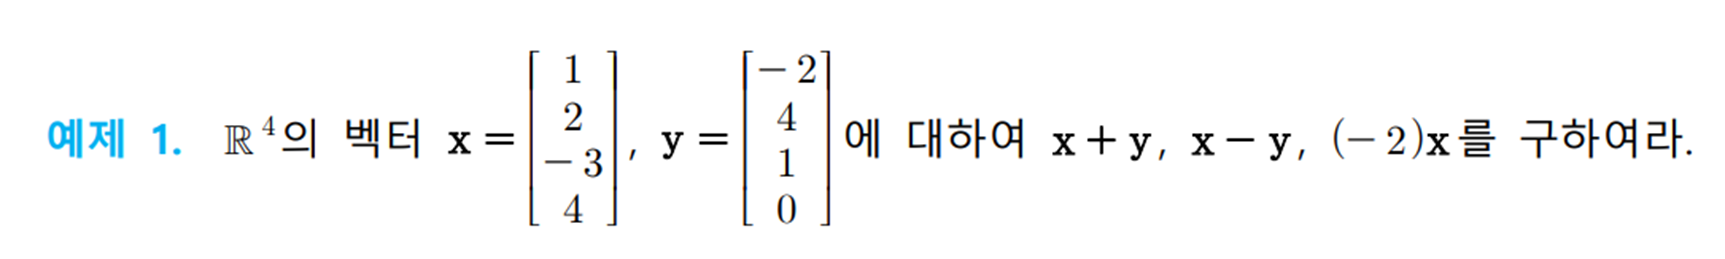

In [80]:
x = torch.tensor([1,2,-1,4], dtype = torch.float).reshape(4,1)
y = torch.tensor([-2,4,1,0], dtype = torch.float).reshape(4,1)

print(x+y)
print(x-y)
print(-2*x)

tensor([[-1.],
        [ 6.],
        [ 0.],
        [ 4.]])
tensor([[ 3.],
        [-2.],
        [-2.],
        [ 4.]])
tensor([[-2.],
        [-4.],
        [ 2.],
        [-8.]])
